<a href="https://colab.research.google.com/github/sahug/ds-wandb/blob/main/WANDB%20-%20Session%205%20-%20Log%20Anything%20with%20WANDB%20Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WANDB - Session 5 - Log Anything with WANDB Media**

**Download and Install**

In [1]:
!pip install wandb -qq

     |████████████████████████████████| 1.7 MB 5.5 MB/s 
     |████████████████████████████████| 181 kB 10.1 MB/s 
     |████████████████████████████████| 144 kB 39.4 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 


In [2]:
#Fetch audio, video and other data files to log
!git clone https://github.com/wandb/examples.git
!pip install soundfile -qq

Cloning into 'examples'...
remote: Enumerating objects: 4904, done.
remote: Counting objects: 100% (1513/1513), done.
remote: Compressing objects: 100% (729/729), done.
remote: Total 4904 (delta 974), reused 1117 (delta 729), pack-reused 3391
Receiving objects: 100% (4904/4904), 111.95 MiB | 23.20 MiB/s, done.
Resolving deltas: 100% (2546/2546), done.
Checking out files: 100% (258/258), done.


In [5]:
import pandas as pd
import numpy as np
import wandb

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [6]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

**Log Metrics**

In [7]:
# Get Apple stock price data from
# https://www.macrotrends.net/stocks/charts/AAPL/apple/stock-price-history
# Read in dataset
apple = pd.read_csv("/content/examples/examples/data/apple.csv")
apple = apple[-1000:]

In [8]:
#Initialize a new run
wandb.init(project="visualize-predictions", name="metrics")

#Log metric in each step
for price in apple["close"]:
  wandb.log({"Stock Price": price})

wandb.finish()

wandb: Currently logged in as: sahug (use `wandb login --relogin` to force relogin)


Stock Price,▁▁▂▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▆▆▄▃▄▄▅▅▅▅▆▆▇█
Stock Price,299.8


**Log Plots**

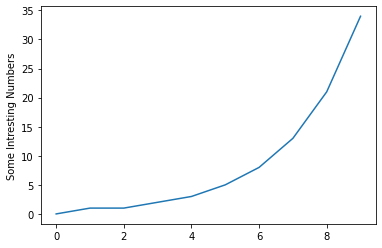

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#Inistalize a new run
wandb.init(project="visualize-predictions", name="plots")

#Make the plot
fibonacci = [0,1,1,2,3,5,8,13,21,34]
fig, ax = plt.subplots()
ax.plot(fibonacci)
ax.set_ylabel("Some Intresting Numbers")

#Log the plot
wandb.log({"plot": fig})
wandb.finish()
fig

**Log Histogram**

In [12]:
#Initialize a new run
wandb.init(project="visualize-predictions", name="histograms")

fibonacci = np.array([0,1,1,2,3,5,8,13,21,34])

#Log a histogram on each step
for i in range(1, 10):
  wandb.log({"histograms": wandb.Histogram(fibonacci / i)})

wandb.finish()

**Log Images**

In [13]:
import matplotlib.pyplot as plt

#Initialize a new run
wandb.init(project="visualize-predictions", name="images")

#Generate an image
path_to_image = "examples/examples/data/cafe.jpg"
im = plt.imread(path_to_image)

#Log the image
wandb.log({"img": [wandb.Image(im, caption="Cafe")]})

wandb.finish()

**Log Videos**

In [14]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="videos")

# Generate a video
path_to_video = "examples/examples/data/openai-gym.mp4"

# Log the video
wandb.log({"video": wandb.Video(path_to_video, fps=4, format="gif")})

wandb.finish()

**Log Audio**

In [15]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="audio")

# Generate audio data
path_to_audio = "examples/examples/data/piano.wav"

# Log that audio data
wandb.log({"examples":
           [wandb.Audio(path_to_audio, caption="Piano", sample_rate=32)]})

wandb.finish()

In [16]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="audio")

# Generate audio data
fs = 44100 # sampling frequency, Hz
length = 3  # length, seconds
xs = np.linspace(0, length, num=fs * length)
waveform = np.sin(fs * 2 * np.pi / 40  * xs ** 2)

# Log audio data
wandb.log({"examples":
           [wandb.Audio(waveform, caption="Boop", sample_rate=fs)]})

wandb.finish()

**Log Tables**

In [17]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="tables")

# Create tabular data, method 1
data = [["I love my phone", "1", "1"],["My phone sucks", "0", "-1"]]
wandb.log({"a_table": wandb.Table(data=data, columns=["Text", "Predicted Label", "True Label"])})

# Create tabular data, method 2
table = wandb.Table(columns=["Text", "Predicted Label", "True Label"])
table.add_data("I love my phone", "1", "1")
table.add_data("My phone sucks", "0", "-1")
wandb.log({"another_table": table})

wandb.finish()

**Log HTML**

In [18]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="html")

# Generate HTML data
path_to_html = "examples/examples/data/some_html.html"

# Log an HTML file
wandb.log({"custom_file": wandb.Html(open(path_to_html))})

# Log raw HTML strings
wandb.log({"custom_string": wandb.Html('<a href="https://mysite">Link</a>')})

wandb.finish()

**Log 3D Objects**

In [19]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="3d_objects")

# Generate 3D object data
path_to_obj = "examples/examples/data/wolf.obj"

# Log the 3D object
wandb.log({"3d_object": wandb.Object3D(open(path_to_obj))})

wandb.finish()

**Log Point Clouds**

In [20]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="point_clouds")

# Generate a cloud of points
points = np.random.uniform(size=(250, 3))

# Log points and boxes in W&B
wandb.log(
        {
            "point_scene": wandb.Object3D(
                {
                    "type": "lidar/beta",
                    "points": points,
                    "boxes": np.array(
                        [
                            {
                                "corners": [
                                    [0,0,0],
                                    [0,1,0],
                                    [0,0,1],
                                    [1,0,0],
                                    [1,1,0],
                                    [0,1,1],
                                    [1,0,1],
                                    [1,1,1]
                                ],
                                "label": "Box",
                                "color": [123,321,111],
                            },
                            {
                                "corners": [
                                    [0,0,0],
                                    [0,2,0],
                                    [0,0,2],
                                    [2,0,0],
                                    [2,2,0],
                                    [0,2,2],
                                    [2,0,2],
                                    [2,2,2]
                                ],
                                "label": "Box-2",
                                "color": [111,321,0],
                            }
                        ]
                    ),
                    "vectors": np.array([])
                }
            )
        }
    )

wandb.finish()